In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
import matplotlib.transforms as transforms
from matplotlib.patches import Ellipse

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The Axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def confidence_ellipse(mu:np.ndarray, cov:np.ndarray, ax:plt.Axes, n_std:float=3.0, facecolor="none", **kwargs):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    # mean_x = np.mean(x)
    mean_x = mu[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    # mean_y = np.mean(y)
    mean_y = mu[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [3]:
import sklearn.preprocessing as preprocessing

In [4]:
data = pd.read_csv("old_faithful.tsv", sep="\t")

In [5]:
sc = preprocessing.StandardScaler()
X = sc.fit_transform(data[["eruptions", "waiting"]].to_numpy())

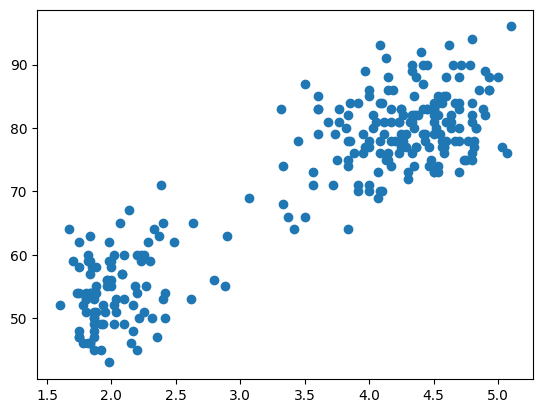

In [6]:
plt.scatter(data["eruptions"], data["waiting"])

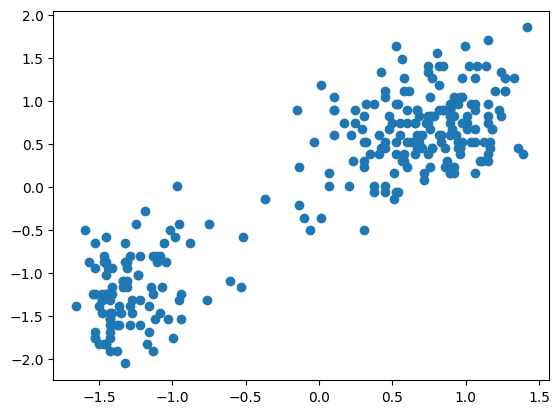

In [7]:
plt.scatter(X[:,0], X[:,1])

## EM Algorithm

#### Probability of x

$
p(x) = {\sum_{k=1}^{K}} \pi_k N(x | \mu_k, \Sigma_k)
$

#### Probability of z

$
{\sum_{k=1}^{K}} \pi_k = 1 , 0 \le \pi_k \le 1
$

$
p(z) = \prod_{k=1}^{K} \pi_{k}^{z_k}
$

#### Conditional probability of x given z
$
p(x | z) = \prod_{k=1}^{K} N(x | \mu_{k}, \Sigma_{k})^{z_k}
$

#### Conditional probability of z given x

$
\gamma(z_k) = p(z | x) = \frac {p(z_k) p(x | z_k)} { \sum_{j=1}^{K} p(z_j)p(x | z_j) }
$



#### Maximum likelihood

$ p(X | \pi, \mu, \Sigma) = \prod_{n=1}^{N} ( \sum_{k=1}^{K} \pi_k N(x_n, \mu_k, \Sigma_k) ) $

$
\ln p(X | \pi, \mu, \Sigma) = \sum_{n=1}^{N} \ln \{ \sum_{k=1}^{K} \pi_k N(x_n | \mu_k, \Sigma_k)   \}
$



EM Algorithm

Let $\Theta$ be model parameters

1. Choose $\Theta^{old}$

2. E Step: Evaluate $p(Z | X, \Theta^{old}) = \gamma(z_k)$

3. M Step: Evaluate $\Theta^{New}$ given by

$\Theta^{new} = argmax  Q (\Theta, \Theta^{old})$

where

$ Q(\Theta, \Theta^{old}) = \sum_{Z} p(Z | X, \Theta^{old}) \ln p(X, Z|\Theta) $

4. Check for convergence, then set $\Theta^{old} \leftarrow \Theta^{new}$

For Gaussian Means / Covariance:

$\frac{d}{d\mu} \ln (p | \Theta) = 0 = - \sum_{n=1}^{N} \gamma (z_{n,k}) \Sigma_{k} (x_n - \mu_k )$

$\frac{d}{dx} = 0 \rightarrow \mu_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma (z_{n,k}) x_n $


$\frac{d}{d\Sigma} = 0 \rightarrow  \Sigma_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma (z_{n,k}) (x_n - \mu_k) (x_n - \mu_k)^{T} $

#### Proposed Model

$
p(x) = \sum_{k=1}^{K} \pi_k N(x | \mu_k, \Sigma_k)
$





In [8]:
np.mean(data["eruptions"]) - np.std(data["eruptions"]), np.mean(data["waiting"]) - np.std(data["waiting"])

(2.3485118780095258, 57.32709880594304)

In [9]:
np.mean(data["eruptions"]), np.std(data["eruptions"]) * 0.5

(3.4877830882352936, 0.569635605112884)

In [10]:
np.mean(data["waiting"]), np.std(data["waiting"]) * 0.5

(70.8970588235294, 6.784980008793186)

In [11]:
K = 2

In [12]:
mu_0 = np.array([[-0.5, -0.5], [0.5, 0.5]])
Sigma_0 = np.array([np.eye(N=2), np.eye(N=2)])

In [13]:
pi = 0.5 * np.ones(K)

In [14]:
def Expectation(X:np.ndarray, pi:np.ndarray, mu:np.ndarray, Sigma:np.ndarray) -> np.ndarray:
    v = []
    for k in range(K):
        # could do log version
        v_ = np.log(pi[k]) + stats.multivariate_normal(mean = mu[k], cov=Sigma[k]).logpdf(X)
        # v_ = pi[k] * stats.multivariate_normal(mean = mu[k], cov=Sigma[k]).pdf(X)
        v.append(v_)

    v = np.array(v)
    v = v.T

    v_max = np.max(v, axis=1, keepdims=True)
    # v = (v - v_max) / ()
    denom = np.sum(np.exp(v - v_max), axis=1, keepdims=True)
    np.exp(v - v_max) / denom

    gamma = np.exp(v - v_max) / denom
    return gamma

In [15]:
def Maximization(X:np.ndarray, gamma:np.ndarray, mu:np.ndarray, Sigma:np.ndarray) -> np.ndarray:
    mu_new = mu
    Sigma_new = Sigma
    N_k = gamma.sum(axis=0) 
    pi_new = N_k / len(X)
    dimension_2 = gamma.shape[1]
    for k in range(dimension_2):
        mu_new[k] = 1 / N_k[k] * gamma[:,k] @ X
        # mu_new[k] = 1 / np.sum(gamma[:,k]) * np.dot(gamma[:,k], X) also works

    for k in range(dimension_2):
        Sigma_new[k] = (1 / N_k[0]) * gamma[:,k] * (X - mu[k]).T @ (X - mu[k])

    return mu_new, Sigma_new, pi_new

def LogLikelihood(X, mu, Sigma, pi):
    loglikelihood = np.zeros(len(X))
    dimension_2 = len(pi) 
    for k in range(dimension_2):
        loglikelihood += np.log(pi[0]) + stats.multivariate_normal.logpdf(X, mu[0], Sigma[0])

    loglikelihood = loglikelihood.sum()
    return loglikelihood

In [16]:
mu = mu_0
Sigma = Sigma_0 
ll = 0.0
delta_ll = 10.0
i = 0
while (delta_ll > 1.0):
    gamma = Expectation(X, pi, mu, Sigma)
    mu, Sigma, pi = Maximization(X, gamma, mu, Sigma)
    new_ll = LogLikelihood(X, mu, Sigma, pi)
    delta_ll = ll - new_ll
    print(f"{i:0>3} Log Likelihood: {new_ll:0>.3f} Delta: {delta_ll:0>.3f}")
    ll = new_ll
    i += 1
    if i > 100: break

000 Log Likelihood: -1698.742 Delta: 1698.742
001 Log Likelihood: -1867.524 Delta: 168.782
002 Log Likelihood: -2347.253 Delta: 479.728
003 Log Likelihood: -3612.482 Delta: 1265.229
004 Log Likelihood: -6953.772 Delta: 3341.290
005 Log Likelihood: -12882.373 Delta: 5928.601
006 Log Likelihood: -15667.319 Delta: 2784.946
007 Log Likelihood: -17320.596 Delta: 1653.277
008 Log Likelihood: -18829.107 Delta: 1508.511
009 Log Likelihood: -20120.219 Delta: 1291.112
010 Log Likelihood: -21058.644 Delta: 938.425
011 Log Likelihood: -21698.177 Delta: 639.533
012 Log Likelihood: -22144.501 Delta: 446.324
013 Log Likelihood: -22468.934 Delta: 324.433
014 Log Likelihood: -22712.316 Delta: 243.382
015 Log Likelihood: -22898.914 Delta: 186.597
016 Log Likelihood: -23044.185 Delta: 145.272
017 Log Likelihood: -23158.563 Delta: 114.378
018 Log Likelihood: -23249.388 Delta: 90.825
019 Log Likelihood: -23321.989 Delta: 72.601
020 Log Likelihood: -23380.326 Delta: 58.337
021 Log Likelihood: -23427.397 Del

In [17]:
mu_0

array([[-1.31007125, -1.24183844],
       [ 0.65322036,  0.61919851]])

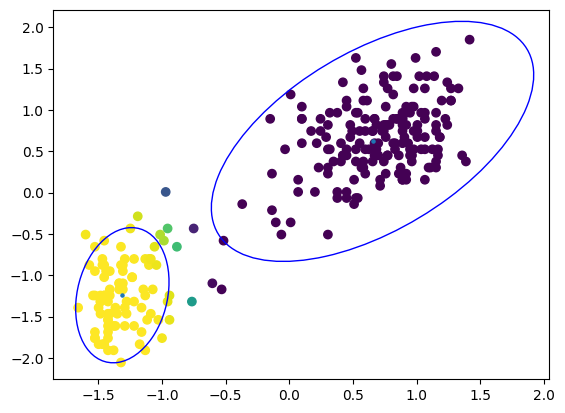

In [18]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=gamma[:,0])
ax.scatter(x=mu[:,0], y=mu[:,1], s=5)
for k in range(K):
    confidence_ellipse(mu[k], Sigma[k], ax, n_std=2.0, edgecolor="blue")